# Sentiment Analysis: Joe

### Imports

In [17]:
import pandas as pd
import re, string, unicodedata
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### Read in the data

In [18]:
df =pd.read_csv('user_ids and their posts.csv')
pd.set_option('display.max_colwidth', -1)

### Functions to clean data

In [19]:
def clean_content(df):
    """
    Cleans up the column by removing incidents of '\r', '\n' and, '\n\n' in a dataframe
    simply pass in a dataframe with 'content column'
    """
    df['content'] = df['content'].apply(lambda x: x.replace('\n',' ')) 
    df['content'] = df['content'].apply(lambda x: x.replace('\r',' '))
    df['content'] = df['content'].apply(lambda x: x.replace('\n\n',' '))
    df['content'] = df['content'].apply(lambda x: x.replace('\r\n',' '))
    df['content'] = df['content'].apply(lambda x: x.replace('34',' '))
    df['content'] = df['content'].apply(lambda x: x.replace('39',' '))

In [20]:
def clean_string(string):
    """
    Removes unsightly html code in a given string
    """
    string = string.lower()
    string = re.sub(r"http\S+", "", string)
#     clean0 = re.compile(r'</code></pre>')
#     out = re.sub(clean0,' ', string)
    clean = re.compile('<.*?>')
    out = re.sub(clean,' ', string)
    clean1 = r'^https?:\/\/.*[\r\n]*'
    out = re.sub(clean1,' ', out)
    clean2 = re.compile(r'[^\w\s]')
    out = re.sub(clean2,' ', out)
    return out

In [21]:
# dictionary of all possible contractions
CONTRACTION_MAP = {
"ain't": "is not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because",
"could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not",
"doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not",
"haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he'll've": "he he will have",
"he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is","I'd": "I would",
"I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","i'd": "i would",
"i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not",
"it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it is",
"let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not",
"mightn't've": "might not have","must've": "must have","mustn't": "must not","mustn't've": "must not have",
"needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
"oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have",
"she'd": "she would","she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is",
"should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have",
"so's": "so as","that'd": "that would","that'd've": "that would have","that's": "that is","there'd": "there would",
"there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have",
"they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have",
"wasn't": "was not","we'd": "we would","we'd've": "we would have","we'll": "we will","we'll've": "we will have",
"we're": "we are","we've": "we have","weren't": "were not","what'll": "what will","what'll've": "what will have",
"what're": "what are","what's": "what is","what've": "what have","when's": "when is","when've": "when have",
"where'd": "where did","where's": "where is","where've": "where have","who'll": "who will",
"who'll've": "who will have","who's": "who is","who've": "who have","why's": "why is","why've": "why have",
"will've": "will have","won't": "will not","won't've": "will not have","would've": "would have",
"wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would",
"y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would",
"you'd've": "you would have","you'll": "you will","you'll've": "you will have","you're": "you are","you've": "you have"
}

# function to expand contractions in text
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    """
    Expands any contractions within a given string
    """

    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

### Cleaning up Joe's comments

In [22]:
# html parser that properly encodes html text to a string that we can work with
import html.parser as htmlparser
parser = htmlparser.HTMLParser()

joe_clean = []
joe_cleaner = []
joe_cleanest = []

# loop through data and extract joe's comments
for i in df['cab6d19d22ec4bdfad4f99760d33312b']:
    # use html parser on joes comments
    joe_clean.append(parser.unescape(str(i)))

for i in joe_clean:
    # use expand contractions on joe's comments
    joe_cleaner.append(expand_contractions(str(i)))
    
for i in joe_cleaner:
    #use clean string function on joe's comments
    joe_cleanest.append(clean_string(str(i)))

# create a dataframe of the processed joes comments
df_joe = pd.DataFrame(joe_cleanest, columns=['content'])

# make sure each comment is only instances of strings (found floats)
df_joe['content']=  df_joe['content'].astype(str)

# remove nans (dropna was not working)
df_joe = df_joe[df_joe.content != 'nan']

# run the joe dataframe through clean content function
clean_content(df_joe)

# look at the joe data
df_joe.head()

,content
0,yeah not masks haha
1,right wing selfish and reckless tiger refuses to double mask even to protect other residents of sanctuary cnn
2,check this out
3,lemmings rude lemmings some people are just trash and you should be content that you would not do the same to them i think that people that jog with a mask on are stupid myself do not do that these same kids probably wear their mask in the car alone and in bed alone at night hahaha
4,elon musk is science denier reeeeeeeeeeeeeee


### Running sentiment analysis on Joe's comments

In [23]:
#import natural language toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()
from nltk.probability import FreqDist
import string

## import word tokenizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

# get lexicon 
nltk.download('vader_lexicon') 
nltk.download('punkt')
nltk.download('stopwords')

#specify dataframe here
nltk_data = df_joe

# tokenize, stem, and remove stop words
nltk_data['token'] = nltk_data['content'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
nltk_data['stop'] = nltk_data['token'].apply(lambda x: [item for item in x if item not in stop_words])
nltk_data['stem'] = nltk_data['stop'].apply(lambda x: [ps.stem(y) for y in x])
stem_nltk_data = nltk_data['stem'].apply(pd.Series).stack()

# calculate word frequency
fdist_nltk_data = FreqDist(stem_nltk_data)

# remove punctuation counts
for punc in string.punctuation:
    del fdist_nltk_data[punc]

# get list of the 'content' (responses) 
nltk_data_list = list(nltk_data['content'].values)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dillon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dillon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dillon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


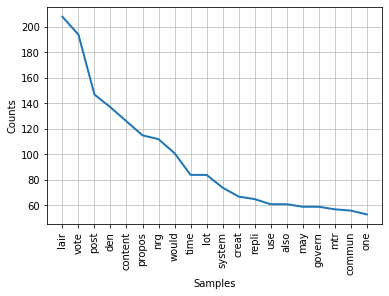

In [24]:
# Frequency Distribution Plot - top 20
# run cell twice if freq dist plot doesn't appear
fdist_nltk_data.plot(20, cumulative=False);

In [25]:
# create function that will output dataframe 
# that stores sentiment information
def get_sentiments(input_list):
    """
    output dataframe that stores sentiment information
    """
    output = pd.DataFrame()
    
    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [26]:
# use the get sentiments function on nltk processed joe data
nltk_data_sentiments = get_sentiments(nltk_data_list)
nltk_data_sentiments.head()

,compound,neg,neu,pos,sentence
0,-0.0721,0.371,0.299,0.329,yeah not masks haha
1,-0.4939,0.248,0.641,0.111,right wing selfish and reckless tiger refuses to double mask even to protect other residents of sanctuary cnn
2,0.0000,0.000,1.000,0.000,check this out
3,-0.7003,0.163,0.781,0.056,lemmings rude lemmings some people are just trash and you should be content that you would not do the same to them i think that people that jog with a mask on are stupid myself do not do that these same kids probably wear their mask in the car alone and in bed alone at night hahaha
4,-0.3612,0.333,0.667,0.000,elon musk is science denier reeeeeeeeeeeeeee


In [27]:
# drop token and stop columns for nltk data and create pos, neg, neu, compound columns
nltk_data_sent = nltk_data.drop(['token','stop'],axis=1)\
.assign(pos=nltk_data_sentiments['pos'])\
.assign(neg=nltk_data_sentiments['neg'])\
.assign(neu=nltk_data_sentiments['neu'])\
.assign(compound=nltk_data_sentiments['compound'])

nltk_data_sent.head()

,content,stem,pos,neg,neu,compound
0,yeah not masks haha,"[yeah, mask, haha]",0.329,0.371,0.299,-0.0721
1,right wing selfish and reckless tiger refuses to double mask even to protect other residents of sanctuary cnn,"[right, wing, selfish, reckless, tiger, refus, doubl, mask, even, protect, resid, sanctuari, cnn]",0.111,0.248,0.641,-0.4939
2,check this out,[check],0.000,0.000,1.000,0.0000
3,lemmings rude lemmings some people are just trash and you should be content that you would not do the same to them i think that people that jog with a mask on are stupid myself do not do that these same kids probably wear their mask in the car alone and in bed alone at night hahaha,"[lem, rude, lem, peopl, trash, content, would, think, peopl, jog, mask, stupid, kid, probabl, wear, mask, car, alon, bed, alon, night, hahaha]",0.056,0.163,0.781,-0.7003
4,elon musk is science denier reeeeeeeeeeeeeee,"[elon, musk, scienc, denier, reeeeeeeeeeeeeee]",0.000,0.333,0.667,-0.3612


In [28]:
# check out joes global sentiment score
joe_global_sentiment = nltk_data_sent["compound"].mean()
joe_global_sentiment

0.31602745901639334

In [29]:
# see where the most negative message is located
nltk_data_sent['compound'].argmin()

136

In [30]:
# look at the most negative column
nltk_data_sent.loc[[136]]

,content,stem,pos,neg,neu,compound
136,if we do not know the winner by monday morning i will claim victory,"[know, winner, monday, morn, claim, victori]",0.108,0.237,0.655,-0.9954


### Happy Button

In [69]:
def happy_button(df):
    # Get a threshold from the user
    start = input('Lower Threshold :\t')
    start = float(start)
    stop = input('Upper Threshold :\t')
    stop = float(stop)
    # Extract and return desired posts
    df = df[(df['compound'] >= start) & (df['compound'] <= stop)]
    return df[['content','compound']].sort_values('compound', ascending = False)

In [72]:
happy_button(nltk_data_sent)

Lower Threshold :	0.5
Upper Threshold :	1


,content,compound
315,i did answer here anyway,0.9992
423,i would like to propose that den change its user interface and web services to limit a denizen s evaluation or voting on a content item to a one hour window of time from their first vote purpose it would force denizens to make their evaluation early and to commit to that evaluation it would solve the issue of people glomming on with nrg for content that is obviously becoming more viral this would possibly also allow the system to retain an all time consensus instead of resetting the consensus process daily this would help content that may have cyclical attention or regular updates this would counter the activity that many would consider manipulation especially in small lairs voting on the same old post with full nrg daily increase efficiency and possibly allow a scalable way to reward more trending items this change should also come with a ui revamp to show more information about the consensus and your evaluation technical notes i ve spoken with the services developer about this and it would definitely be doable possibly even increasing efficiency and scalability this fact may be able to increase the number of trending items that would be included in the evaluator pool if we do that we may want to look at how we determine and rank trending items which should be discussed later in the governance lair,0.9990
453,thank you for editing btw,0.9967
125,best to spend that time reviewing the white paper asking questions on the formulas and algorithms following the incentives watching your metrics to measure performance learning what role you are good at and improve profit we added the metrics report to help people understand what activities are getting them mtr most efficiently it is all there i have experimented with it myself and it does work right now is the best time as the system is mostly in place the rewards real and the competition low in time competition will be intense,0.9961
265,some have purchased on opensea which is a mostly reduced rate but there is still an eth transaction necessary some of the answer is just in timing waiting for the fees to drop as they occasionally will do in the future we are considering to propose additional governance votes for holders of mtr and or lor and that proposal would go through the existing governance process,0.9918
...,...,...
446,this post should not be in the lcp lair please delete,0.5267
361,yes already reported should be addressed soon,0.5253
62,if you ask me he is a nation state actor,0.5106
335,ok we are looking please also see here i made comments there as well i think it is something with cache but will research,0.5095


### Function to check sentiment score before posting

In [89]:
def dont_post(input_list):
    output = bool  
    if 'no' in input_list or 'bye' in input_list or 'stop' in input_list or 'quit' in input_list:
        return True
    return False

In [91]:
def do_post(input_list):
    output = bool  
    if 'yes' in input_list or 'ok' in input_list or 'go' in input_list:
        return True
    return False

In [100]:
def check_sentiment():
    
    # list to store user post if they intend to post
    msg_list = []
    
    #create sentiment dataframe here
    msg = input('Message :\t')
    d = {'content': [msg]}
    df = pd.DataFrame(data=d)
    
    # specify data for sentiment analysis
    nltk_data = df
    
    # tokenize, stem, and remove stop words
    nltk_data['token'] = nltk_data['content'].apply(word_tokenize)
    stop_words = set(stopwords.words('english'))
    nltk_data['stop'] = nltk_data['token'].apply(lambda x: [item for item in x if item not in stop_words])
    nltk_data['stem'] = nltk_data['stop'].apply(lambda x: [ps.stem(y) for y in x])
    stem_nltk_data = nltk_data['stem'].apply(pd.Series).stack()
    
    # get list of the 'content' (responses) 
    nltk_data_list = list(nltk_data['content'].values)
    
    # get sentiments
    nltk_data_sentiments = get_sentiments(nltk_data_list)
    
    # alert user of sentiment score
    print('Sentiment Score:', nltk_data_sentiments['compound'])
    print('Are you sure you want to post this?')
    
    # get user response
    chat = True
    while chat:
        user_input = input('User Input :\t')
        out_msg = None
        
        # Check for an end msg 
        if dont_post(user_input):
            out_msg = 'Removing post'
            chat = False
            
        if do_post(user_input):
            out_msg = 'Okay, posting'
            chat = False
            #now we will store the message to be posted
            msg_list.append(msg)

        print(out_msg)
        
        if msg_list is not None:
            print('User Post:',msg)

In [102]:
check_sentiment()

Message :	Owen is the best, i love that guy.
Sentiment Score: 0    0.8555
Name: compound, dtype: float64
Are you sure you want to post this?
User Input :	yes
Okay, posting
User Post: Owen is the best, i love that guy.
